In [67]:
import scipy.sparse.linalg
import numpy as np
import matplotlib as plt
import seaborn as sns
import math
import pandas as pd
from scipy.special import kolmogorov
from scipy.stats import kstwobign, norm, lognorm

In [68]:
# contructs transition matrix
def transitionmat(n: int, k: int, dist: str):
    tmat = np.zeros((2*n+1,2*n+1))
    for i in range (2*n+1):
        ind = k/2 * (i - (2*n)/2)
        if i==0:
            tmat[i,i+1] = 1 /(1+10**((ind)/400))
            tmat[i,i] = 1 /(1+10**((-ind)/400))
        elif i==(2*n):
            tmat[i,i] = 1 /(1+10**((ind)/400))
            tmat[i,i-1] = 1 /(1+10**((-ind)/400))
        else:
            tmat[i,i+1] = 1 /(1+10**((ind)/400))
            tmat[i,i-1] = 1 /(1+10**((-ind)/400))
    return tmat

In [69]:
# computes stationary distribution through left eigenvector with eigenvalue 1
def invdis(tmat, m):
    evalues, evectors = np.linalg.eig(tmat.T)
    min_ev = np.argmin(abs(evalues - 1))
    ev = evectors[:, min_ev]
    pi = np.real(ev.T)
    return pi/np.sum(pi)

In [70]:
# computes stationary distribution approx through least squares solving pi.T P = pi.T
def invdis_ls(tmat, m):
    idmat = (tmat - scipy.sparse.eye(m))
    lhs = scipy.sparse.vstack((idmat.T, np.ones((1,m))))
    v = np.zeros(m+1)
    v[m] = 1
    return scipy.sparse.linalg.lsqr(lhs, v)[0]

In [157]:
# plots discrete distribution on given interval
def plot(pi, n: int, s:int):
    inv = np.zeros((2*n+1,2))
    si = abs(int(np.rint((2*n+1-s)/2)))
    for i in range(2*n+1):
        inv[i,0]=k/2* (i - (2*n)/2)
        inv[i,1]=pi[i]
    sns.set_style("darkgrid")
    plt.pyplot.figure(figsize=(10,6))
    pl = sns.barplot(y=inv[si:2*n+1-si,1],x=inv[si:2*n+1-si,0],  color="#0070B8")
    pl.set_xlabel("state", fontsize = 14)
    pl.set_ylabel("$\pi_i$", fontsize = 14)
    plt.pyplot.show()

In [81]:
# compute variance of stat. dis.
def n_variance(p, n, k):
    v = 0
    for i in range(n*2+1):
        v += p[i] * (k/2* (i - (2*n)/2))**2
    return v

In [74]:
# converts discrete distribution to pandas dataframe with index of state
def dframe(pi, n:int):
    ind = np.zeros(2*n+1)
    for i in range (2*n+1):
        ind[i] = (i - (2*n)/2)
    d =  {'state': ind*k, 'pi': pi}
    return pd.DataFrame(data=d)

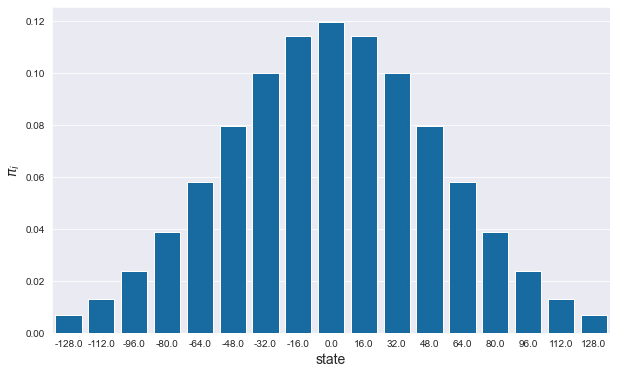

Wall time: 482 ms


In [410]:
%%time
#Example step by step: set params, compute matrix, compute pi, plot
n = 128
k = 32
tmat = transitionmat(n, k, "uni")
pi = invdis(tmat, 2*n+1)
pi_ls = invdis_ls(tmat, 2*n+1)
plot(pi, n, 16)

In [60]:
for n_range in range(0,20,1):
    print('state = %f, val = %f' % ((n_range-3)*16, pi[n_range+n-3]))

state = -48.000000, val = 0.079832
state = -32.000000, val = 0.099974
state = -16.000000, val = 0.114422
state = 0.000000, val = 0.119687
state = 16.000000, val = 0.114422
state = 32.000000, val = 0.099974
state = 48.000000, val = 0.079832
state = 64.000000, val = 0.058261
state = 80.000000, val = 0.038856
state = 96.000000, val = 0.023682
state = 112.000000, val = 0.013190
state = 128.000000, val = 0.006712
state = 144.000000, val = 0.003121
state = 160.000000, val = 0.001326
state = 176.000000, val = 0.000515
state = 192.000000, val = 0.000182
state = 208.000000, val = 0.000059
state = 224.000000, val = 0.000017
state = 240.000000, val = 0.000005
state = 256.000000, val = 0.000001


In [ ]:
%%time # time benchmarks?
#n = 100 #tmat = transitionmat(n, 32, "uni") #pi = invdis(tmat, 2*n+1)

In [141]:
k = 32
n = 256
tmat = transitionmat(n, k, "uni")
pi = invdis(tmat, (2*n+1))
v = n_variance(pi,n,k)
print('var = %f , with std = %f' % (v, np.sqrt(v)))

var = 2843.484685 , with std = 53.324335


In [86]:
n = 256
for i in range(1,10,1):
    tmat = transitionmat(n, (2**i), "uni")
    pi = invdis(tmat, (2*n+1))
    v = n_variance(pi,n, 2**i)
    #var = getvar((2**k_i),n)
    print('k value = %f , with Std = %f' % (2**i, np.sqrt(v)))

k value = 2.000000 , with Std = 13.189685
k value = 4.000000 , with Std = 18.666429
k value = 8.000000 , with Std = 26.436172
k value = 16.000000 , with Std = 37.493231
k value = 32.000000 , with Std = 53.324335
k value = 64.000000 , with Std = 76.255946
k value = 128.000000 , with Std = 110.190466
k value = 256.000000 , with Std = 162.271000
k value = 512.000000 , with Std = 246.696948


In [85]:
n = 128
for i in range(1,10,1):
    tmat = transitionmat(n, (2**i), "uni")
    pi = invdis(tmat, (2*n+1))
    v = n_variance(pi,n, 2**i)
    #var = getvar((2**k_i),n)
    print('k value = %f , with Std = %f' % (2**i, np.sqrt(v)))

k value = 2.000000 , with Std = 13.189685
k value = 4.000000 , with Std = 18.666429
k value = 8.000000 , with Std = 26.436172
k value = 16.000000 , with Std = 37.493231
k value = 32.000000 , with Std = 53.324335
k value = 64.000000 , with Std = 76.255946
k value = 128.000000 , with Std = 110.190466
k value = 256.000000 , with Std = 162.271000
k value = 512.000000 , with Std = 246.696948


In [162]:
for n_range in range(2,20,1):
    print('n value = %f , with var = %f' % (n_range, getvar(512,n_range)))

n value = 2.000000 , with var = 58195.708011
n value = 3.000000 , with var = 60801.459306
n value = 4.000000 , with var = 60859.130855
n value = 5.000000 , with var = 60859.383997
n value = 6.000000 , with var = 60859.384230
n value = 7.000000 , with var = 60859.384230
n value = 8.000000 , with var = 60859.384230
n value = 9.000000 , with var = 60859.384230
n value = 10.000000 , with var = 60859.384230
n value = 11.000000 , with var = 60859.384230
n value = 12.000000 , with var = 60859.384230
n value = 13.000000 , with var = 60859.384230
n value = 14.000000 , with var = 60859.384230
n value = 15.000000 , with var = 60859.384230
n value = 16.000000 , with var = 60859.384230
n value = 17.000000 , with var = 60859.384230
n value = 18.000000 , with var = 60859.384230
n value = 19.000000 , with var = 60859.384230


In [142]:
n = 128
for i in range(1,10,1):
    k = 2**i
    tmat = transitionmat(n, (2**i), "uni")
    pi = invdis(tmat, (2*n+1))
    v = n_variance(pi,n, 2**i)
    e_cdf = np.cumsum(pi)
    x = np.linspace(-(k/2)*n,(k/2)*n,n*2+1)
    n_pdf = np.array([norm(0,np.sqrt(v)).pdf(i) for i in x])
    n_cdf = np.array([norm(0,np.sqrt(v)).cdf(i) for i in x])
    max_gap = np.max(np.abs((e_cdf-n_cdf)))
    arg_max = np.argmax(np.abs(e_cdf-n_cdf))
    print('k value = %f , with Std = %f , var = %f' % (2**i, np.sqrt(v), v))
    print('MaxGap = %f, At Elo state %f, relative gap: %f' % (max_gap, k/2 * (arg_max - (2*n)/2), (max_gap/n_cdf[arg_max])))
    print(pi[n]/2)

k value = 2.000000 , with Std = 13.189685 , var = 173.967793
MaxGap = 0.015123, At Elo state 0.000000, relative gap: 0.030247
0.015123260007103116
k value = 4.000000 , with Std = 18.666429 , var = 348.435586
MaxGap = 0.021372, At Elo state 0.000000, relative gap: 0.042744
0.0213721353875297
k value = 8.000000 , with Std = 26.436172 , var = 698.871171
MaxGap = 0.030181, At Elo state 0.000000, relative gap: 0.060363
0.03018129807398781
k value = 16.000000 , with Std = 37.493231 , var = 1405.742342
MaxGap = 0.042560, At Elo state 0.000000, relative gap: 0.085120
0.04256012671669488
k value = 32.000000 , with Std = 53.324335 , var = 2843.484684
MaxGap = 0.059844, At Elo state 0.000000, relative gap: 0.119687
0.05984362738790455
k value = 64.000000 , with Std = 76.255946 , var = 5814.969368
MaxGap = 0.083663, At Elo state 0.000000, relative gap: 0.167326
0.08366289876409025
k value = 128.000000 , with Std = 110.190466 , var = 12141.938737
MaxGap = 0.115624, At Elo state 0.000000, relative g

In [426]:
r = 64
std_mat = np.zeros((r,2))
n = 128
for i in range(0,r,1):
    k = (i+1)*8
    tmat = transitionmat(n, (k), "uni")
    pi = invdis(tmat, (2*n+1))
    v = n_variance(pi,n,k)
    std_mat[i,0] = k
    std_mat[i,1] = np.sqrt(v)
std_mat

array([[  8.        ,  26.43617164],
       [ 16.        ,  37.49323062],
       [ 24.        ,  46.05011958],
       [ 32.        ,  53.32433482],
       [ 40.        ,  59.78591686],
       [ 48.        ,  65.67516293],
       [ 56.        ,  71.1343672 ],
       [ 64.        ,  76.25594645],
       [ 72.        ,  81.10388733],
       [ 80.        ,  85.72462721],
       [ 88.        ,  90.153108  ],
       [ 96.        ,  94.41638657],
       [104.        ,  98.5359083 ],
       [112.        , 102.5290027 ],
       [120.        , 106.40990351],
       [128.        , 110.19046573],
       [136.        , 113.88068277],
       [144.        , 117.48906791],
       [152.        , 121.02294101],
       [160.        , 124.48864776],
       [168.        , 127.89172996],
       [176.        , 131.23705941],
       [184.        , 134.5289446 ],
       [192.        , 137.77121654],
       [200.        , 140.96729861],
       [208.        , 144.12026383],
       [216.        , 147.23288226],
 

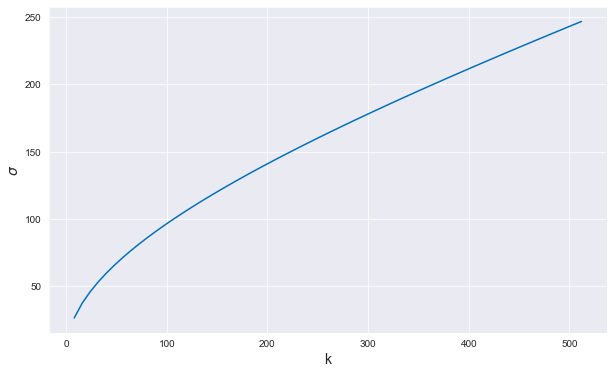

In [310]:
#plt.pyplot.plot(std_mat[:,1])
sns.set_style("darkgrid")
plt.pyplot.figure(figsize=(10,6))
pl = sns.lineplot(x = std_mat[:,0], y=std_mat[:,1], color="#0070B8")
pl.set_xlabel("k", fontsize = 14)
pl.set_ylabel("$\sigma$", fontsize = 14)
plt.pyplot.show()
#sns.lineplot(x = std_mat[:,0], y=std_mat[:,1])

In [418]:
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

In [475]:
def func(x, a, b, c, d):
    return a * x + b * x**c + d

x = std_mat[:,0]
y = std_mat[:,1]

popt, pcov = curve_fit(func, x, y)

In [476]:
popt

array([ 0.18119483, 14.63231911,  0.38507113, -7.8800847 ])

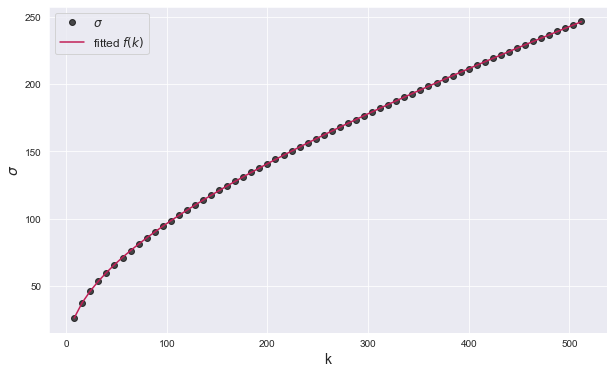

In [477]:
sns.set_style("darkgrid")
plt.pyplot.figure(figsize=(10,6))
plt.pyplot.xlabel("k", fontsize = 14)
plt.pyplot.ylabel("$\sigma$", fontsize = 14)
plt.pyplot.plot(x, y, 'ko', label="$\sigma$", markerfacecolor='black', alpha=0.7)
plt.pyplot.plot(x, func(x, * popt), '#C21E56', label="fitted $f(k)$")
plt.pyplot.legend(fontsize = 12)
plt.pyplot.show()

In [478]:
k = 512
0.09883696*k+ 8.60690081*np.sqrt(k)

245.35645720803166

In [479]:
loss = (func(std_mat[:,0], *popt) - std_mat[:,1])**2
sum(loss)/64

0.006770112808121363

In [483]:
np.max(abs(np.sqrt(loss)))

0.27799697561197334

In [484]:
np.argmax(abs(loss))

0

In [372]:
loss[2]

2.2891752114603174

In [368]:
func(512,*popt)

245.3564570422407

In [509]:
k = 2
n = int(512/k)
tmat = transitionmat(n, k, "uni")
pi = invdis(tmat, 2*n+1)
pi_ls = invdis_ls(tmat, 2*n+1)

v = n_variance(pi_ls,n, k)
e_cdf = np.cumsum(pi)
x = np.linspace(-(k/2)*n,(k/2)*n,n*2+1)
n_pdf = np.array([norm(0,np.sqrt(v)).pdf(i) for i in x])
n_cdf = np.array([norm(0,np.sqrt(v)).cdf(i) for i in x])
print('Var = %f, Std = %f' % (v, np.sqrt(v)))
v

Var = 730.412877, Std = 27.026152


730.4128771474542

In [388]:
max_gap = np.max(np.abs((e_cdf-n_cdf)))
arg_max = np.argmax(np.abs(e_cdf-n_cdf))
print('MaxGap = %f, At Elo state %f, relative gap: %f' % (max_gap, k/2 * (arg_max - (2*n)/2), (max_gap/n_cdf[arg_max])))

MaxGap = 0.059844, At Elo state 0.000000, relative gap: 0.119687


In [389]:
max_gap = np.max(np.abs((e_cdf-n_cdf)))
arg_max = np.argmax(np.abs(e_cdf-n_cdf))
print('MaxGap = %f, At Elo state %f, relative gap: %f' % (max_gap, k/2 * (arg_max - (2*n)/2), (max_gap/n_cdf[arg_max])))

MaxGap = 0.059844, At Elo state 0.000000, relative gap: 0.119687


[]

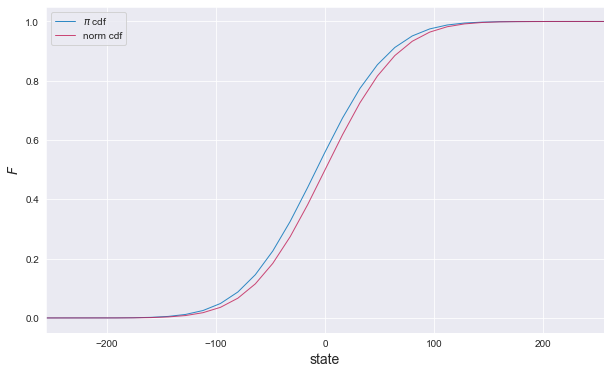

In [401]:
fig, ax = plt.pyplot.subplots(figsize=(10,6))
sns.set_style("darkgrid")
ax.set_xlabel("state", fontsize = 14)
ax.set_ylabel("$F$", fontsize = 14)
plt.pyplot.xlim([-256, 256])
ax.plot(x, e_cdf,'#0070B8', lw=1, alpha=0.8, label='$\pi$ cdf')
ax.plot(x, n_cdf,'#C21E56', lw=1, alpha=0.8, label='norm cdf')
plt.pyplot.legend()
plt.pyplot.plot()